# Implement Convolutional neural network. Tune for real datasets. (use Keras library)


A convolution multiplies a matrix of pixels with a filter matrix or ‘kernel’ and sums up the multiplication values. Then the convolution slides over to the next pixel and repeats the same process until all the image pixels have been covered.

**Dataset : MNIST Dataset**

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1297s 113us/step


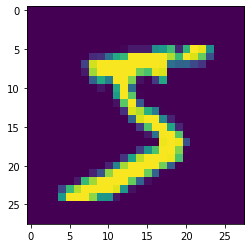

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
mnist_train=model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2208 - accuracy: 0.9542 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 2/3
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0916 - val_accuracy: 0.9740
Epoch 3/3
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0863 - val_accuracy: 0.9757


In [14]:
model.predict(X_test[:4])

array([[2.3006319e-10, 1.1080143e-15, 1.6290464e-08, 6.1569573e-08,
        1.6395024e-14, 1.3673920e-13, 3.5414983e-21, 9.9999988e-01,
        1.5124410e-11, 2.1074912e-08],
       [4.1660932e-11, 4.3371821e-07, 9.9999952e-01, 8.9703445e-10,
        4.1982276e-13, 4.5565700e-12, 1.4016813e-08, 7.6795489e-18,
        5.2231846e-09, 5.0904419e-15],
       [2.4295619e-11, 9.9991822e-01, 2.0390401e-07, 2.8219989e-11,
        1.5990086e-05, 2.2762727e-06, 1.8155273e-09, 1.2387198e-07,
        6.3220366e-05, 4.4328372e-09],
       [9.9980181e-01, 9.0843418e-12, 3.1988399e-08, 4.3082469e-12,
        8.2023756e-11, 1.4483738e-08, 1.9490001e-04, 2.0204780e-09,
        6.0171097e-08, 3.2359178e-06]], dtype=float32)

In [15]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)